In [102]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

#Bayesian Analysis

A coin is flipped 10 times with the outcomes H, H, H, T, T, H, H, H, T, H Using a uniform prior for the probability $p$ of heads, what is the posterior probability that $p <= .6$? What is the probability that $p>=.8$?

In [142]:
# H, H, H, T, T, H, H, H, T, H
"""
  returns the Probability of x given theta
"""
def Pg(x, theta):
  return (theta**x)*((1-theta)**(1-x))

"""
  One step in bayes theorem to compute the posterier from the prior

                    f(x|theta)*P(theta)
  P(theta|x) = -----------------------------------
                sum(f(x|theta')P(theta'), theta')
"""
def prior(x, theta, P, Pg, thetaP):
  den = 0
  for i in range(0, len(thetaP)):
    den += Pg(x,thetaP[i])*P[i]
    if thetaP[i] == theta:
      prob = P[i]
  num = Pg(x,theta)*prob
  return num/den

"""
  Bayes theorem

"""
def Bayes(x, thetas, odds, Pg):
  for i in x:
    newodds = []
    for j in range(0, len(thetas)):
      theta = thetas[j]
      newodds.append(prior(i, theta, odds, Pg, thetas))
    odds = newodds
  return odds
x = [1,1,1,0,0,1,1,1,0,1]
thetas = np.linspace(0, 1, 100)
odds = np.ones(100)/100
results = Bayes(x, thetas, odds, Pg)

In [144]:
l60 = 0
for i in range(0, 61):
  l60 += results[i]
print(l60)
m80 = 0
for i in range(81, 100):
  m80 += results[i]
print(m80)

0.32311791648243393
0.13322535326093196


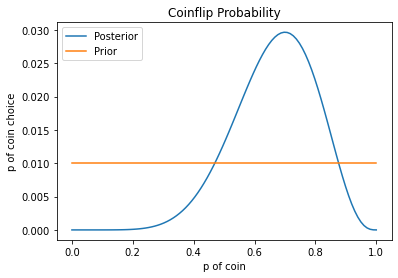

In [145]:
n = 100
p = np.linspace(0, 1, n)
odds = np.ones(n)/n
results = Bayes(x, p, odds, Pg)
plt.plot(p, results, label = "Posterior")
plt.plot(thetas, odds, label = "Prior")
plt.legend()
plt.title("Coinflip Probability")
plt.xlabel("p of coin")
plt.ylabel("p of coin choice")
plt.show()

# Gamma Distributions
given a prior distribution of Gamma(3,6) find the posterior pdf given a sample of [2.1, 3.2, 4.4, 1.9, 3.5, 2.6, 3.1, 2.5, 2.4]. What is the posterior probability that an average lifespan is at least 3 months?

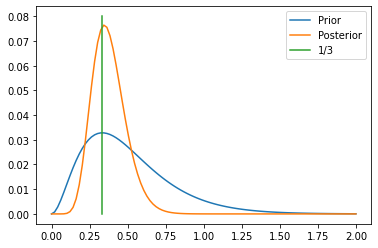

In [146]:
def GammaPDF(x, t, theta):
  return (theta**t)*(x**(t-1))*(np.e**(-theta*x))/np.math.gamma(t)
def f(x, gTheta, const = 1):
  return GammaPDF(x, gTheta, t = const)
def f2(theta, a = 3, b = 6):
  return (b**a)*(theta**(a-1))*(np.e**(-b*theta))/np.math.gamma(a)
def plotF2(x):
  return f2(x)
def f1(x, gTheta):
  return GammaPDF(x, 1, gTheta)

maxTheta = 2
n = 100
myThetas = np.linspace(0, maxTheta, 100)
myOdds = plotF2(myThetas)

myOdds = myOdds/sum(myOdds) # Making the Prior follow the law of total probability

plt.plot(myThetas, myOdds, label = "Prior")

x = [2.1, 3.2, 4.4, 1.9, 3.5, 2.6, 3.1, 2.5, 2.4]

myOdds = Bayes(x, thetas = myThetas, odds = myOdds, Pg = f1)
plt.plot(myThetas, myOdds, label = "Posterior")
plt.plot(np.ones(2)*1/3, np.linspace(0,.08,2), label = "1/3")
plt.legend()
plt.show()

In [148]:
def getGreaterThan(x, y, val = 1/3):
  if len(x) != len(y):
    raise ValueError("Invalid inputs")
  sum = 0
  for i in range(0, len(y)):
    if y[i] >= val:
      sum += x[i]
  return sum
min = getGreaterThan(myOdds, -myThetas, val = -1/3)
pos = getGreaterThan(myOdds, myThetas, val = 1/3)
print(min)
print(pos)

0.3690697349016235
0.6309302650983772


# Choosing Models
Given the following data determine the better of 2 models

Model A is Gamma(5, $\theta$)

Model B is Log Normal with $\sigma$ = .22

Determine the constants $\mu$ and $\theta$ for the models and which of the 2 is superior.

In [151]:
#Data Sample
data = [1.14100959, 1.31980447, 1.135674, 0.96791387, 0.53588466,
2.93299174, 1.04955202, 1.74396968, 1.36402414, 0.95746836,
1.09965837, 3.51344737, 2.12657541, 0.75780219, 1.16422567,
1.06375512, 1.5677688, 4.68730819, 0.99465398, 1.25416606,
0.96154763, 1.8676816, 1.54831825, 0.87657987, 0.71757672,
2.14676169, 1.39724357, 2.31117609, 1.67784414, 3.00226991,
1.13755842, 1.09798153, 1.44177474, 0.96978758, 0.93488513,
1.81462166, 3.14162804, 1.72057458, 0.76842934, 2.79938548,
2.51933544, 1.88732513, 1.44364805, 1.38858673, 0.88127979,
1.75230809, 1.85906018, 1.98008284, 1.31373874, 1.47935435,
1.2507477, 0.43940755, 1.47891103, 1.08912984, 2.60858172,
3.04109028, 0.96862144, 2.16500551, 1.44061445, 2.53603706,
2.55833789, 1.28223543, 1.69078547, 2.09655515, 2.19918162,
2.3357052, 1.42289867, 2.81399095, 2.83846134, 2.53624084,
1.04991746, 0.48241893, 1.96213454, 1.86406956, 0.90786545,
1.48485272, 1.61195012, 2.31739658, 1.33193619, 1.15185199,
0.62056104, 2.16771325, 3.32195297, 1.1092185, 1.07328561,
1.26088704, 3.23622363, 1.38092778, 1.59384, 1.79595108,
1.17111326, 2.45646154, 2.75704963, 1.90926557, 4.26884465,
1.5452869, 1.29764722, 2.30820743, 0.94622077, 1.87145581]

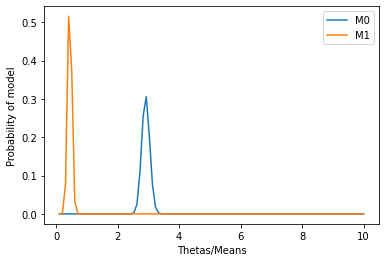

myOdds 1.0000000000000002
myOdds2 0.9999999999999997


In [161]:
# Model 0
def Lfunc8150(x, theta):
  return GammaPDF(x, 5, theta)

def Pfunc8150(x):
  return f2(x, 2, 1)

#Model 1
def norm(x, loc = 0, scale = 1):
  return (np.e**-((np.log(x)-loc)**2)/(2*scale**2))/(np.sqrt(2*np.pi)*x*scale)

def Lfunc8151(x, mu):
  return norm(x, loc = mu, scale = .22)

def Pfunc8151(x):
  return norm(x, loc = 0, scale = 1)
thetas = np.linspace(0, 10, 100)[1:]
odds = Pfunc8150(thetas)
myOdds = Bayes(data, thetas, odds, Lfunc8150)

means = np.linspace(0, 10, 100)[1:]
odds2 = Pfunc8151(means)
myOdds2 = Bayes(data, means, odds2, Lfunc8151)

plt.plot(thetas, myOdds, label = "M0")
plt.plot(means, myOdds2, label = "M1")
plt.legend()
plt.xlabel("Thetas/Means")
plt.ylabel("Probability of model")
plt.show()
print("myOdds", sum(myOdds))
print("myOdds2", sum(myOdds2))

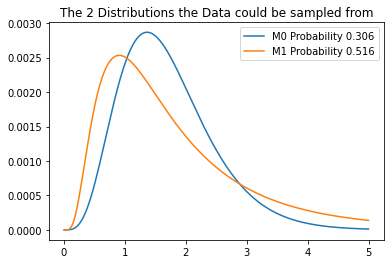

In [162]:
x = np.linspace(0, 5, 1000)[1:]
maxTheta = thetas[list(myOdds).index(max(myOdds))]
maxMean = means[list(myOdds2).index(max(myOdds2))]

def Mfunc8150(x):
  return GammaPDF(x, 5, maxTheta)

def Mfunc8151(x):
  return norm(x, loc = maxMean, scale = .22)

plt.plot(x, Mfunc8150(x)/sum(Mfunc8150(x)), label = "M0 Probability " + str(round(max(myOdds), 3)))
plt.plot(x, Mfunc8151(x)/sum(Mfunc8151(x)), label = "M1 Probability " + str(round(max(myOdds2), 3)))
plt.title("The 2 Distributions the Data could be sampled from")
plt.legend()
plt.show()

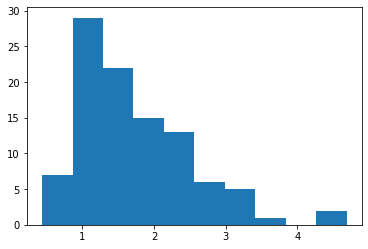

In [163]:
plt.hist(data)
plt.show()